In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# VARIABILI
csvfile = '../csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

# PULIZIA DATI
distance_cond = tragitti[distance_param] != 0
moovit_cond = tragitti['Public'] > 12
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0
coherence_cond = (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])
cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

In [3]:
tragitti = tragitti[car_cond & coherence_cond]

In [4]:
# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    vmedia_giorno_ore = []
    for ora in ore:
        tragitti_fascia_oraria = df[df['Hour'] == ora]
        velocita_media_oraria = tragitti_fascia_oraria[mezzo] - tragitti_fascia_oraria['Car']
        vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore
    
def vmedia_week_plot(df, mezzo):
    sd = 4
    weeks = \
        ((df['Month'] == 5) & (
            (df['Day'].between(sd, sd + 4)) |
            (df['Day'].between(sd + 7, sd + 7 + 4)) |
            (df['Day'].between(sd + 7*2, sd + 7*2 + 4)) |
            (df['Day'].between(sd + 7*3, sd + 7*3 + 4)))) | \
        ((df['Month'] == 6) & (
            (df['Day'].between(1, 1 + 4)) |
            (df['Day'].between(1 + 7, 1 + 7 + 4)) |
            (df['Day'].between(1 + 7*2, 1 + 7*2 + 4)) |
            (df['Day'].between(1 + 7*3, 1+7*3 + 4))))

    weekends = \
        ((df['Month'] == 5) & (
            (df['Day'].between(sd + 5, sd + 5 + 1)) |
            (df['Day'].between(sd + 7 + 5, sd + 7 + 5 + 1)) |
            (df['Day'].between(sd + 7*2 + 5, sd + 7*2 + 5 + 1)) |
            (df['Day'].between(sd + 7*3 + 5, sd + 7*3 + 5 + 1)))) | \
        ((df['Month'] == 6) & (
            (df['Day'].between(1 + 5, 1 + 5 + 1)) |
            (df['Day'].between(1 + 7 + 5, 1 + 7 + 5 + 1)) |
            (df['Day'].between(1 + 7*2 + 5, 1 + 7*2 + 5 + 1)) |
            (df['Day'].between(1 + 7*3 + 5, 1 + 7*3 + 5 + 1))))
    
    lst = [
        vmedia_giorno(df[weeks], mezzo),
        vmedia_giorno(df[weekends], mezzo)]
    array = np.array(lst).T
    
    df = pd.DataFrame(array, index=range(7,24), columns=['Lun-Ven', 'Sab-Dom']).round(2)
    df.plot(marker='o', legend=True)
    plt.xticks(np.arange(7, 24, 1))
    plt.xlabel('orario [h]')
    plt.ylabel('t.medio raggiung. ' + mezzo + ' [m]')
    plt.show()

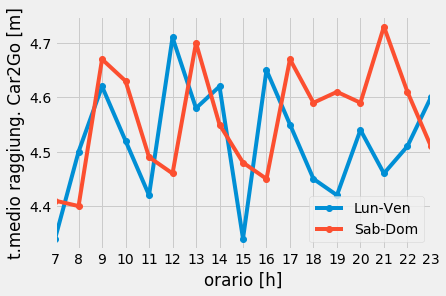

In [5]:
vmedia_week_plot(tragitti, 'Car2Go')

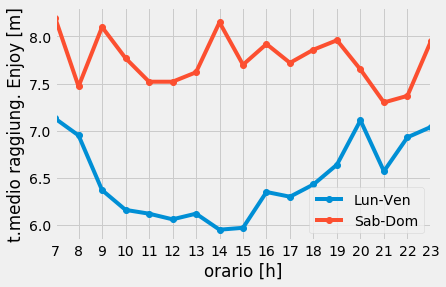

In [6]:
vmedia_week_plot(tragitti, 'Enjoy')

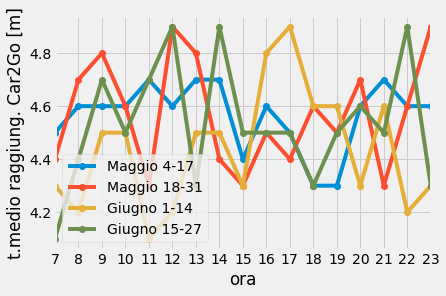

In [7]:
lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 17) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Car2Go'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Car2Go'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 14) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Car2Go'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Car2Go')]

array = np.array(lst).T

confronto_vmedie_week_by_week = pd.DataFrame(
    array,
    index=range(7,24),
    columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)

confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('t.medio raggiung. Car2Go [m]')
plt.xticks(range(7,24,1))
plt.show()

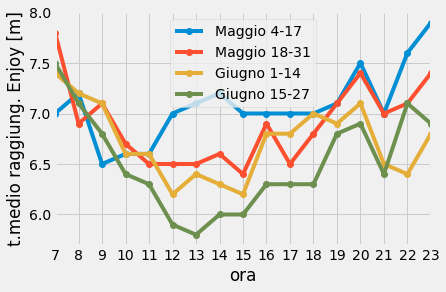

In [8]:
lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 17) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Enjoy'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Enjoy'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 14) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Enjoy'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27) & (tragitti['Car'] != 0) & (tragitti['Car'] < tragitti['Car2Go']) & (tragitti['Car'] < tragitti['Enjoy'])], 'Enjoy')]

array = np.array(lst).T

confronto_vmedie_week_by_week = pd.DataFrame(
    array,
    index=range(7,24),
    columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)

confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('t.medio raggiung. Enjoy [m]')
plt.xticks(range(7,24,1))
plt.show()